# Navigation



### Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import os
import torch
from dqn_agent import *
from model import QNetwork


In [2]:
os.chdir("../python/")

In [3]:
from unityagents import UnityEnvironment
import numpy as np


In [10]:
import matplotlib.pyplot as plt

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [4]:
env = UnityEnvironment(file_name="../p1_navigation/Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
# # get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### DQN in the Environment


In [7]:
agent = Agent(len(state), brain.vector_action_space_size, seed=RANDOM_SEED)


In [8]:
tot_reward = []
for e in range(1000):
    env_info = env.reset(train_mode=True)[brain_name] 
    state = env_info.vector_observations[0]           
    score = 0 
    while True:
        action = int(agent.act(state, eps=0.))       
        env_info = env.step(action)[brain_name] 
        agent.step(state, action, env_info.rewards[0], env_info.vector_observations[0], env_info.local_done[0]) 
        next_state = env_info.vector_observations[0]   
        reward = env_info.rewards[0]                   
        done = env_info.local_done[0]                  
        score += reward                                
        state = next_state                            
        if done:     
            tot_reward.append(score)
            break
    if e %100 == 0:
        print("Average Reward over {} epochs: {}".format(e+1, np.mean(tot_reward)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth') 

Average Reward over 1 epochs: 1.0
Average Reward over 101 epochs: 10.623762376237623
Average Reward over 201 epochs: 12.412935323383085
Average Reward over 301 epochs: 12.817275747508306
Average Reward over 401 epochs: 12.970074812967582
Average Reward over 501 epochs: 13.461077844311378
Average Reward over 601 epochs: 13.715474209650582
Average Reward over 701 epochs: 13.80599144079886
Average Reward over 801 epochs: 14.004993757802746
Average Reward over 901 epochs: 14.064372918978913


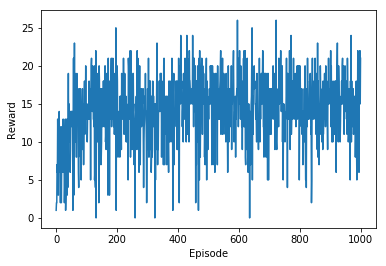

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(tot_reward)), tot_reward)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.show()

In [ ]:
env.close()